In [1]:
import ststools as sts

Software de visualizacao de arquivos de STS Nanosurf e Omicron v1.0.1
By Rafael Reis Barreto, contato rafinhareis17@gmail.com
Arquivos Nanosurf tipo csv (x,y,z) 
Aquivos Omicron tipo .txt ou .asc para grid. NAO MUDAR O NOME DO ARQUIVO PADRAO
Se sentir no fundo do coracaozinho, poe meu nome no artigo =D


In [2]:
sts.Open_files()

Nanosurf mode selected
Files: 
D:/Doutorado/Python/Bibliotecas/ststools/Examples/Nanosurf/Thiago_COPRINUS_BRANCO0128B.csv
D:/Doutorado/Python/Bibliotecas/ststools/Examples/Nanosurf/Thiago_COPRINUS_BRANCO01267B.csv
D:/Doutorado/Python/Bibliotecas/ststools/Examples/Nanosurf/Thiago_COPRINUS_BRANCO01267F.csv
Uploaded
60


In [3]:
sts.Display()

interactive(children=(IntSlider(value=0, continuous_update=False, description='Select Curve: ', layout=Layout(…

In [4]:
sts.Save_data()

Write down the number of the files that you DON'T want to save. Separated by comma.


interactive(children=(Textarea(value='', description='List of curve numbers: ', layout=Layout(width='400px'), …

In [6]:
sts.Hist_plot()

In [ ]:
sts.Hist_metal()

In [ ]:
sts.Hist_molecule()

In [ ]:
import ststools as sts
sts.Open_files()

Nanosurf mode selected
File:  D:/Doutorado/Python/Bibliotecas/ststools/Examples/Nanosurf/Grid/GeS_mapa.csv
Uploaded


In [ ]:
sts.Grid_plot()

In [ ]:
def open_file(name):
    file = open(name, 'r', encoding='utf-8',
                errors='ignore')  # open the file.
    # creat a list that will be full filed with the file with a line as a list element.
    file_list = []
    for line in file:  # open a loop that cover the file.
        line = line.strip('\n')  # drop out all '\n' contained in every line.
        # change the spaces for a element of a list, ex: 'the energy is' --> ['the','energy','is'].
        line = line.split()
        file_list.append(line)  # add the line in the list file_list.
    file.close()  # close de file.
    return file_list


In [ ]:
from os import walk,path,mkdir,listdir,remove,rmdir
from pandas import read_csv, DataFrame,concat
from numpy import array, arange, log, sqrt,meshgrid, rot90,linspace,sort
from scipy import interpolate
from sklearn.linear_model import LinearRegression
from scipy.signal import savgol_filter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import ipywidgets as widgets
from tkinter import *
from tkinter import ttk
from tkinter import filedialog
from tkinter.messagebox import showinfo
from PIL import Image, ImageTk
from urllib.request import urlopen
import warnings
path = 'Examples/Omicron/Grid/I(V) TraceUp Sat May 13 07_56_11 2023 [28-1]  STM_Spectroscopy STM.asc'

def map_spip_temp(map_file):
            arquivo = open_file(map_file)
            for line in arquivo:
                if ('z-range' in line) == True:
                    z_range = float(line[3])*pow(10,-9)
                elif ('z-points' in line) == True:
                    z_points = int(line[3])                 
                

            V_start = -z_range/2
            V_end = z_range/2
            dv = (V_end -V_start)/(z_points)
            V = []
            number = V_start
            for i in range(z_points):
                V.append(number)
                number+=dv
                number  = round(number,3)
            V = array(V)
            return [arquivo,V]

def map_spip(arquivo,delta = 5,V_thre=0):
            matriz = []
            i = 0
            for line in arquivo:
                if ('x-pixels' in line) == True:
                    n = int(line[3])
                elif ('y-pixels' in line) == True:
                    m = int(line[3])
                elif ('x-length' in line) == True:
                    x_leng = float(line[3]) 
                elif ('y-length' in line) == True:
                    y_leng = float(line[3])
                elif ('x-offset' in line) == True:
                    x_ofsset = float(line[3]) 
                elif ('y-offset' in line) == True:
                    y_ofsset = float(line[3]) 
                elif ('z-range' in line) == True:
                    z_range = float(line[3])*pow(10,-9)
                elif ('z-points' in line) == True:
                    z_points = int(line[3])                 
                
                elif  ('Start' in line) == True and ('of' in line) == True and ('Data:' in line) == True:
                    break 
                i+=1

            
            dx = (x_leng)/n
            print(x_leng,dx)
            x = arange(-x_leng/2,x_leng/2,dx)+x_ofsset
            dy = (y_leng)/m
            y = arange(-y_leng/2,y_leng/2,dy)+y_ofsset


        
            sts_all =array(list(map(lambda x:array(list(map( lambda y:float(y),x))), arquivo[i+1:])))
            V_points = len(sts_all[0])
            V_start = -z_range/2
            V_end = z_range/2
            dv = (V_end -V_start)/(V_points)
            V = []
            number = V_start
            for i in range(V_points):
                V.append(number)
                number+=dv
                number  = round(number,3)
            V = array(V)
            matriz = []
            for j in range(m):
                col = []
                for i in range(n):
                    col.append(sts_all[j+(n-i-1)*n])
                matriz.append(array(col))

            nx = len(x);ny =len(y)
            M_didv = [];M_dop=[];M_gap = []
            for i in range(nx):
                col_didv = [];col_dop = [];col_gap = []
                for j in range(ny):

                    dx,dy = didv(V,matriz[i][j])
                    gap,typ,xmin,xmax = gap_type(dx,dy,delta/100)
                    
                    dyinterp = interpolate.interp1d(dx,dy)

                    col_didv.append(dyinterp(V_thre))
                    col_dop.append(round(typ,3))
                    col_gap.append(round(gap,3))
                M_didv.append(array(col_didv));M_dop.append(array(col_dop));M_gap.append(array(col_gap))

            M_didv = array(M_didv);M_dop = array(M_dop);M_gap = array(M_gap)
            return [x,y,[M_didv,M_gap,M_dop]]

def didv(x,y):
    h = x[1]-x[0]
    deri_y = []; deri_x =[]
    for i in range(1,len(x)-1):
        d = (y[i+1]-y[i-1])/(2*h)
        deri_x.append(x[i])
        deri_y.append(d)
    deri_y=array(deri_y)
    return [array(deri_x),deri_y/deri_y.max()]

def gap_type(dx,dy,delta):
    f = interpolate.interp1d(dx, dy)
    marker1 = False; marker2 = False

    for i in range(len(dx)-1):
        if dx[0]<0:
            if dx[i]<=0 and dx[i+1]>=0:
               indice_x0 = i
               break
    marker1 = False; marker2 = False

    for i in range(len(dx)):
        if dx[0]<0:
          if i <= indice_x0:
            j= indice_x0-i
            if f(dx[j])<= delta and marker1 == False:
                xmin = dx[j]
            else:
               marker1 = True

          elif i > indice_x0:
            j= i 
            if f(dx[j])<= delta and marker2 == False:
                xmax = dx[j]
            else:
               marker2 = True
               
    try:
        gap = xmax-xmin
    except UnboundLocalError:
        xmin = 0
        xmax = 0
        gap = 0
    typ = abs(xmax) - abs(xmin)
    return [round(gap,2),round(typ,2),xmin,xmax]

def inter_x(x,y,z,dx = 100, dy= 100):

    interp = interpolate.RegularGridInterpolator((x,y),z)
    xnew = linspace(x.min(),x.max(),dx)
    ynew = linspace(y.min(),y.max(),dy)
    
    M_int = []
    for i in range(len(xnew)):
        pts = []
        for j in range(len(ynew)):
            pts.append([xnew[i],ynew[j]])
        pts = array(pts)
        col = interp(pts)
        M_int.append(array(col))
    
    return [xnew,ynew,array(M_int)]


394.521 6.164390625


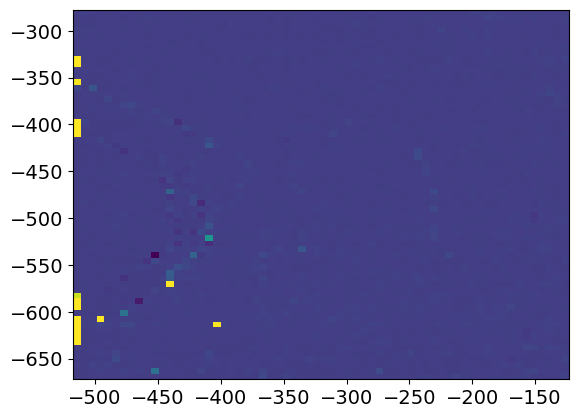

In [ ]:
arquivo , V =map_spip_temp(path)

fig, ax= plt.subplots()
x,y,mapas =map_spip(arquivo)
Y,X = meshgrid(y,x)
M = mapas[0]
im = ax.pcolormesh(X,Y,M)